# Creating regular meshes programmatically with `dolfin's` `MeshEditor`

In [1]:
import dolfin as df
import numpy as np
from finmag.util.meshes import plot_mesh_with_paraview

[2014-09-12 16:18:22] INFO: Finmag logging output will be appended to file: '/home/mb4e10/.finmag/global.log'
[2014-09-12 16:18:22] DEBUG: Building modules in 'native'...
[2014-09-12 16:18:23] DEBUG: FinMag          5456:27cbded430148bcb03df4f29bede5c6073cba14a
[2014-09-12 16:18:23] DEBUG: Dolfin          1.4.0                Matplotlib      1.3.1               
[2014-09-12 16:18:23] DEBUG: Numpy           1.8.1                Scipy           0.14.0              
[2014-09-12 16:18:23] DEBUG: IPython         2.1.0                Python          2.7.6               
[2014-09-12 16:18:23] DEBUG: Paraview        4.0.1-1ubuntu1       Sundials        2.5.0               
[2014-09-12 16:18:23] DEBUG: Boost-Python    <unknown>            Linux           Ubuntu 14.04.1 LTS  
[2014-09-12 16:18:23] DEBUG: Registering debug signal handler. Press Ctrl-Z at any time to stop execution and jump into the debugger.


Usually it is best to use external software like `Netgen` or `Gmsh` to create meshes because these can create meshes of high quality for finite element applications. However, in some situations it can be helpful to use very regular meshes (e.g. for debugging, to test certain assumptions).

In this tutorial we show how to create such meshes programmatically using `dolfin's` `MeshEditor`.

As an example we create a mesh which consists of a 3D array of tetrahedra of the same shape. This array should consist of `nx`, `ny`, `nz` tetrahedra in the x, y, z-directions, respectively.

In [2]:
nx = 5
ny = 3
nz = 2

N = nx * ny * nz  # total number of cells in the mesh

First we need to create an instance of the `MeshEditor` class.

In [3]:
editor = df.MeshEditor()

Next we create an 'empty' mesh and open it in the editor. The `open` command needs two keyword arguments which specify the topological and geometrical dimension, respectively. Since we would like to create a 3D mesh, these are both equal to 3 in our case.

In [4]:
mesh = df.Mesh()
editor.open(mesh, 3, 3)

Next we need to let the `MeshEditor` know how many vertices and cells the final mesh should have.

In [5]:
editor.init_vertices(4*N)
editor.init_cells(N)

Finally, we can add all the vertices and cells. Since all cells look the same, we start by defining the vertices of a standard simplex and simply translate them by a certain amount for each cell.

The `add_vertex` command accepts the index of the vertex to be added as the first argument and a `numpy.array` of vertex coordinates as the second argument. Note that it is important that the entries of the coordinate array are of type `float`, otherwise `dolfin` will throw an error.

Similarly, the `add_cell` command accepts the index of the cell to be added as the first argument and the list of vertex indices of that cell as the second argument. Again, this list must be a numpy array with entries of type `uintp`, otherwise `dolfin` throws an error.

In [6]:
# Define vertices of a standard simplex
v0 = np.array([0., 0., 0.])
v1 = np.array([1., 0., 0.])
v2 = np.array([0., 1., 0.])
v3 = np.array([0., 0., 1.])

cur_cell = 0
for i in xrange(nx):
    for j in xrange(ny):
        for k in xrange(nz):
            d = np.array([2. * i, 2. * j, 2. * k])  # displacement vector for the current cell

            idx0 = 4 * cur_cell
            idx1 = idx0 + 1
            idx2 = idx0 + 2
            idx3 = idx0 + 3

            editor.add_vertex(idx0, v0 + d)
            editor.add_vertex(idx1, v1 + d)
            editor.add_vertex(idx2, v2 + d)
            editor.add_vertex(idx3, v3 + d)

            editor.add_cell(cur_cell, np.array([idx0, idx1, idx2, idx3], dtype=np.uintp))
            cur_cell += 1

Finally, we need to close the `MeshEditor` (otherwise random crashes can occur).

In [7]:
editor.close()

Plotting the mesh we see that indeed the array of tetrahedra has been constructed as expected.

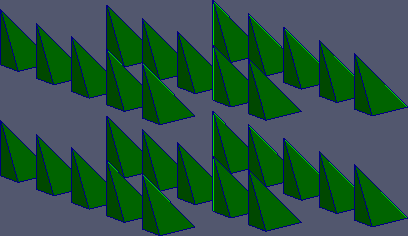

In [9]:
plot_mesh_with_paraview(mesh, camera_position=[150, -50, 20], use_parallel_projection=True, use_display=0)